In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from Ex5_Task3 import finite_diff, rand_datapoints, rbf
from scipy.integrate import solve_ivp
from sklearn.metrics import mean_squared_error

## Get and visualize dataset

In [3]:
initial_points = np.loadtxt('nonlinear_vectorfield_data_x0.txt')
advanced_points = np.loadtxt('nonlinear_vectorfield_data_x1.txt')

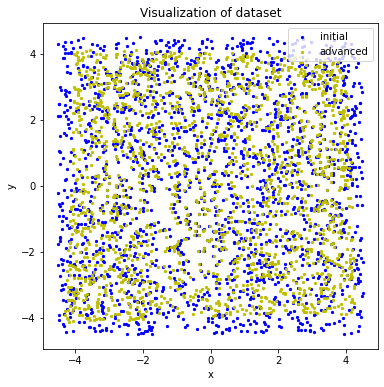

In [4]:
fig = plt.figure(figsize=(6,6))
plt.scatter(initial_points[:,0], initial_points[:,1], c='b', s=5, label='initial')
plt.scatter(advanced_points[:,0], advanced_points[:,1], c='y', s=5, label='advanced')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Visualization of dataset")
plt.legend()
plt.show()

Compute and plot vector field with finite-difference equation 

In [5]:
delta_t = 0.1
V = finite_diff(initial_points, advanced_points, delta_t)

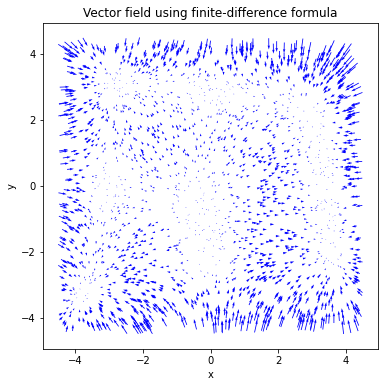

In [6]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()
ax.quiver(initial_points[:,0], initial_points[:, 1], V[:,0], V[:, 1], color='b')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Vector field using finite-difference formula")
plt.show()

## Estimate the vector field with a linear operator

In [7]:
A = np.linalg.lstsq(initial_points, V, rcond=None)[0].T
V_lin = (A.dot(initial_points.T)).T

Compute estimated advanced points with the linear operator and the mean squared error between the estimated points and the actual advanced points

In [8]:
X_lin = V_lin * delta_t + initial_points
print(mean_squared_error(X_lin, advanced_points))

0.018635040587481


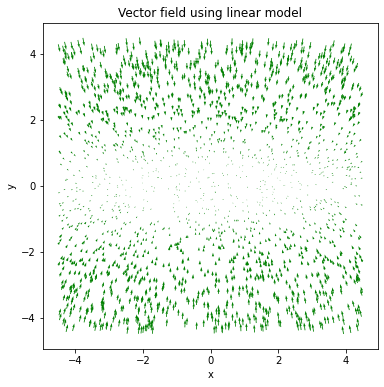

In [9]:
fig3 = plt.figure(figsize=(6,6))
ax3 = fig3.add_subplot()
ax3.quiver(initial_points[:,0], initial_points[:, 1], V_lin[:,0], V_lin[:, 1], color='g')
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("Vector field using linear model")
plt.show()

## Estimate the vector field using radial basis functions

In [10]:
L = 50
xl = rand_datapoints(initial_points, L)
D = euclidean_distances(initial_points, xl, squared=True)
epsilon = 0.05 * np.max(D)
phi = rbf(xl, initial_points, epsilon)

In [11]:
C = np.linalg.lstsq(phi, V, rcond=None)[0]
V_rbf = (phi.dot(C))

In [12]:
X1_rbf = V_rbf * delta_t + initial_points
print(mean_squared_error(X1_rbf, advanced_points))

0.0018838185583310626


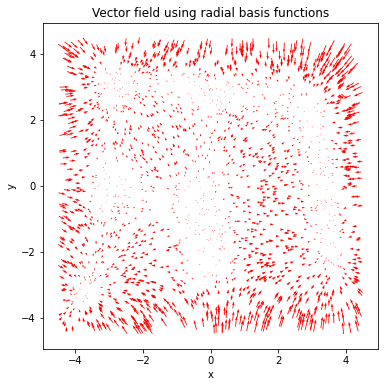

In [12]:
fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot()
ax2.quiver(initial_points[:,0], initial_points[:, 1], V_rbf[:,0], V_rbf[:, 1], color='r')
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Vector field using radial basis functions")
plt.show()

## Find steady states

In [13]:
x = np.meshgrid(np.linspace(-5, 5, 20))
function = lambda t, x: rbf(xl, x.reshape((1, 2)), epsilon) @ C

steady_states = np.zeros((initial_points.shape[0], 2))
for i in range(initial_points.shape[0]):
    steady_states[i, :] = solve_ivp(function, t_span=[0, 50], t_eval=[49], y0=initial_points[i, :]).y.reshape(-1)

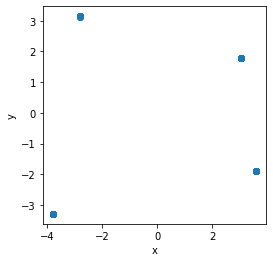

In [14]:
fig5 = plt.figure(figsize=(4,4))
ax5 = fig5.add_subplot()
ax5.scatter(steady_states[:, 0], steady_states[:, 1])
ax5.set_xlabel("x")
ax5.set_ylabel("y")
plt.show() 